In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


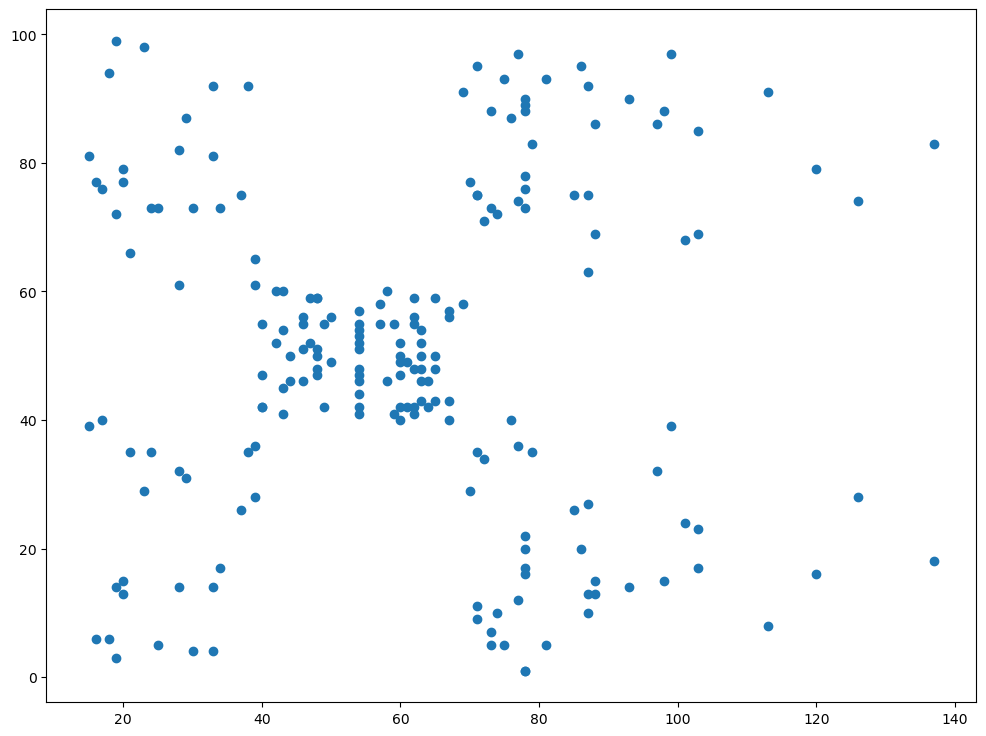

In [3]:
plt.figure(figsize=(12,9))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

In [4]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
mn = MinMaxScaler()
x = mn.fit_transform(x)

In [7]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [8]:
import scipy.cluster.hierarchy as sch

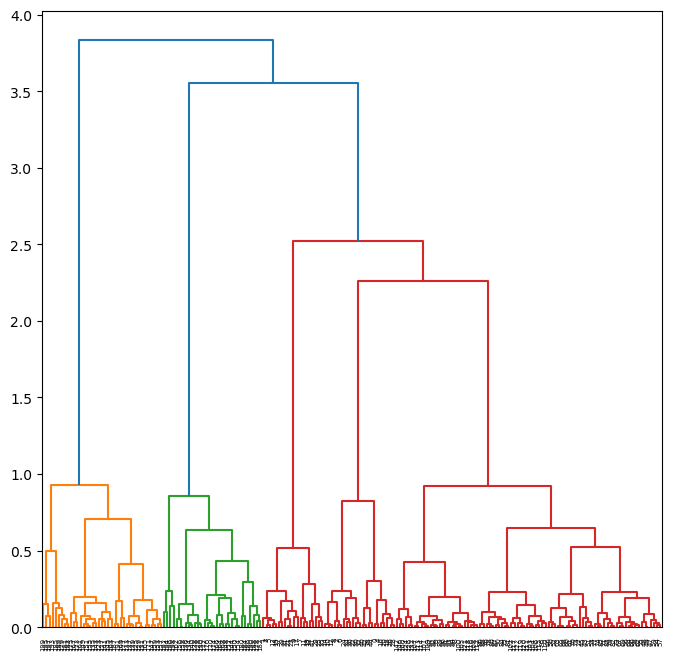

In [9]:
plt.figure(figsize=(8,8))
lk = sch.linkage(x,method='ward')
ddf = sch.dendrogram(lk)

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=4)
km.fit(x)
labels = km.fit_predict(x)

In [12]:
km.inertia_

6.110312266413656

In [13]:
km.cluster_centers_

array([[0.27262295, 0.56612245],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.59016393, 0.17991407]])

In [14]:
labels

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette = {}
wcss = []
for k in range(2,15):
    km = KMeans(n_clusters=k)
    km.fit(x)
    silhouette[k] = silhouette_score(x, km.labels_, metric='euclidean')
    wcss.append(km.inertia_)

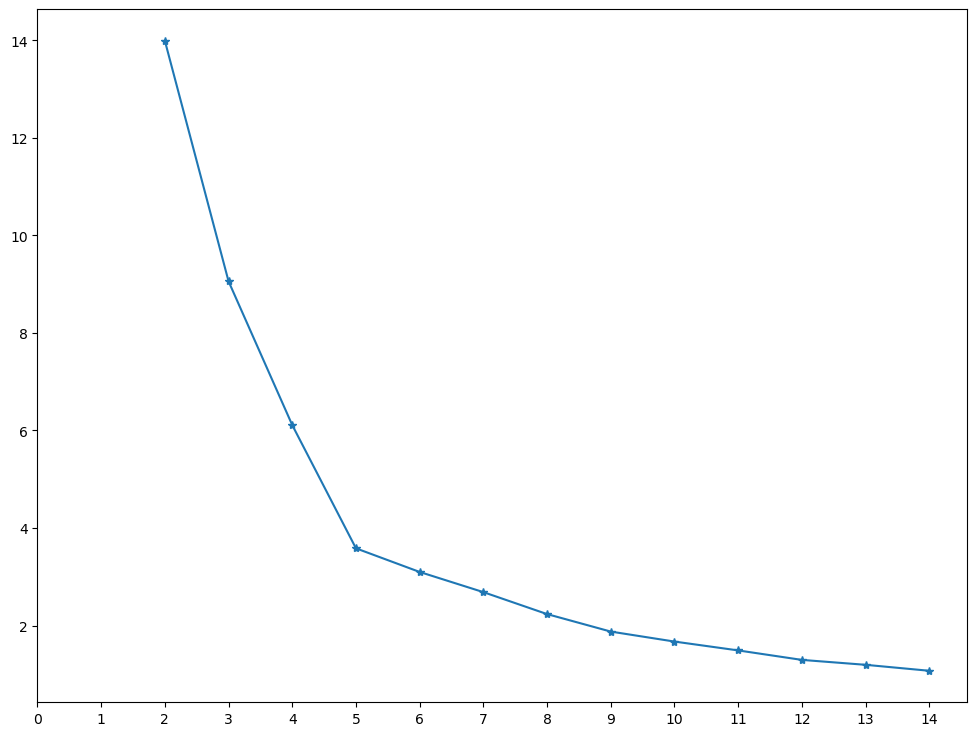

In [17]:
plt.figure(figsize=(12,9))
plt.plot(range(2,15), wcss,marker='*')
plt.xticks(range(15))
plt.show()

In [18]:
silhouette

{2: 0.3334020547986479,
 3: 0.45149093095396486,
 4: 0.49620078746385005,
 5: 0.5594854531357838,
 6: 0.5377658513133245,
 7: 0.43622899911644164,
 8: 0.43483336621341906,
 9: 0.4418004179022118,
 10: 0.44597120274914254,
 11: 0.4347103513698692,
 12: 0.4354619798508317,
 13: 0.44641594401739226,
 14: 0.4276312352744212}

In [19]:
km = KMeans(n_clusters=5)
km.fit(x)
labels = km.fit_predict(x)

In [20]:
km.inertia_

3.58311790595256

In [21]:
labels

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [22]:
df['cluster'] = labels

In [23]:
km.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149]])

In [24]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


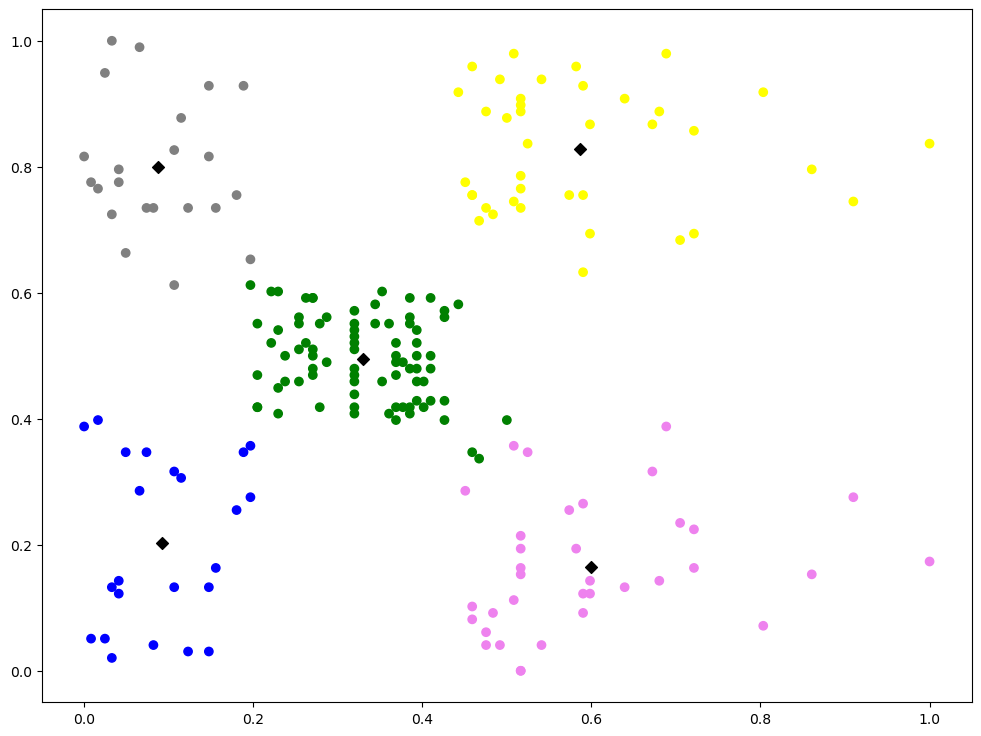

CPU times: user 158 ms, sys: 3.88 ms, total: 162 ms
Wall time: 160 ms


In [26]:
%%time
cmap = {0 : 'grey',1 : 'green',2 : 'blue', 3: 'yellow', 4: 'violet'}
label_color = [cmap[l] for l in km.labels_]
plt.figure(figsize=(12,9))
plt.scatter([i[0] for i in x], [i[1] for i in x], c=label_color)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='D')
plt.show()